# Multiple Linear Regression

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('../../Data/automobileEDA.csv')
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [3]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price',
       'city-L/100km', 'horsepower-binned', 'diesel', 'gas'],
      dtype='object')

In [6]:
to_select=df.loc[:, ['engine-size', 'horsepower', 'highway-mpg', 'curb-weight']]
to_select

,engine-size,horsepower,highway-mpg,curb-weight
0,130,111.0,27,2548
1,130,111.0,27,2548
2,152,154.0,26,2823
3,109,102.0,30,2337
4,136,115.0,22,2824
...,...,...,...,...
196,141,114.0,28,2952
197,141,160.0,25,3049
198,173,134.0,23,3012
199,145,106.0,27,3217


In [9]:
x = df.drop('price', axis=1)
y = df['price']

In [13]:
x

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,2.68,9.0,111.0,5000.0,21,27,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,3.47,9.0,154.0,5000.0,19,26,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,3.40,10.0,102.0,5500.0,24,30,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,3.40,8.0,115.0,5500.0,18,22,13.055556,Medium,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,3.15,9.5,114.0,5400.0,23,28,10.217391,Medium,0,1
197,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,3.15,8.7,160.0,5300.0,19,25,12.368421,High,0,1
198,-1,95,volvo,std,four,sedan,rwd,front,109.1,0.907256,...,2.87,8.8,134.0,5500.0,18,23,13.055556,Medium,0,1
199,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,0.907256,...,3.40,23.0,106.0,4800.0,26,27,9.038462,Medium,1,0


In [14]:
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
196    16845.0
197    19045.0
198    21485.0
199    22470.0
200    22625.0
Name: price, Length: 201, dtype: float64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [18]:
to_select = ['engine-size', 'horsepower', 'highway-mpg', 'curb-weight']

In [24]:
x_train_multi=x_train[to_select].values
y_test_mult=x_train[to_select].values

In [33]:
model = LinearRegression()
model.fit(x_train_multi, y_train)


LinearRegression()

In [34]:
predic = model.predict(x_train_multi)

In [41]:
model.intercept_

-11539.108515802072

In [42]:
model.coef_

array([ 93.34038826,  54.23019834, -18.71070774,   3.1154028 ])

price = -11539.108515802072 + 93.34038826* engine-size+  54.23019834 * horsepower-18.71070774 * highway-mpg +   3.1154028 * curb-weight

## Exercise

In [43]:
to_select=['engine-size', 'horsepower']
x_train_multi=x_train[to_select].values
y_test_mult=x_train[to_select].values

model = LinearRegression()
model.fit(x_train_multi, y_train)


LinearRegression()

In [44]:
model.intercept_

-8499.328552319712

In [45]:
model.coef_

array([119.67188538,  64.08477772])

In [46]:
to_select=['normalized-losses', 'highway-mpg']
x_train_multi=x_train[to_select].values
y_test_mult=x_train[to_select].values

model = LinearRegression()
model.fit(x_train_multi, y_train)


LinearRegression()

In [47]:
model.intercept_

39354.53006543251

In [48]:
model.coef_

array([-6.48165446e-01, -8.45491910e+02])

# Model Evaulation using Visualization

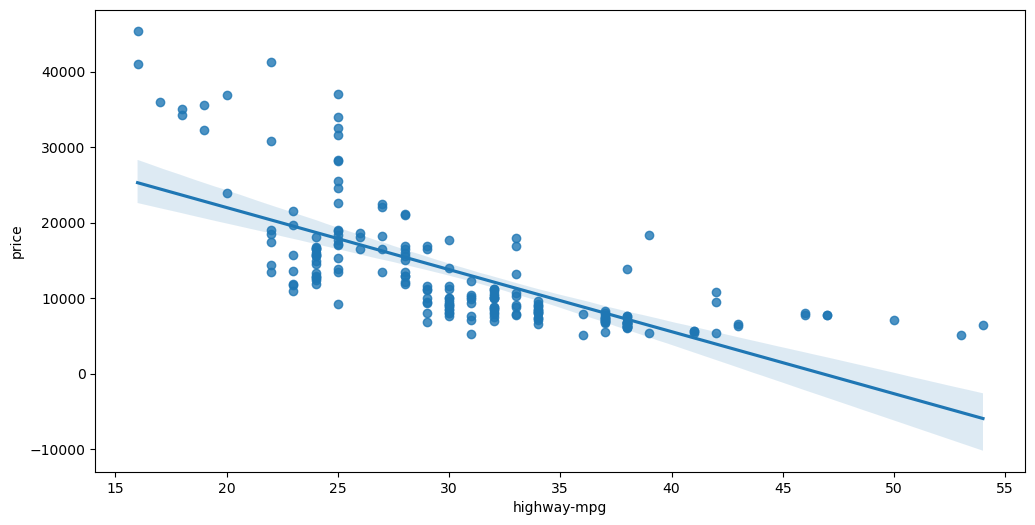

In [52]:
plt.figure(figsize=(12, 6))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.show()

* We see slope of line which is negative, which we predicted earlier when fitting simple linear regression line.
* More dispersed is the data point from the regression line, it will be not suitable to model such data point wwith linear regression.
* Hence, if the data is too far from the line, this linear model might not be the best fit model for this data.
* In above plot, data is not perfectlt liner, so simple polynomial regression can do better job, since it can capture non linear data.

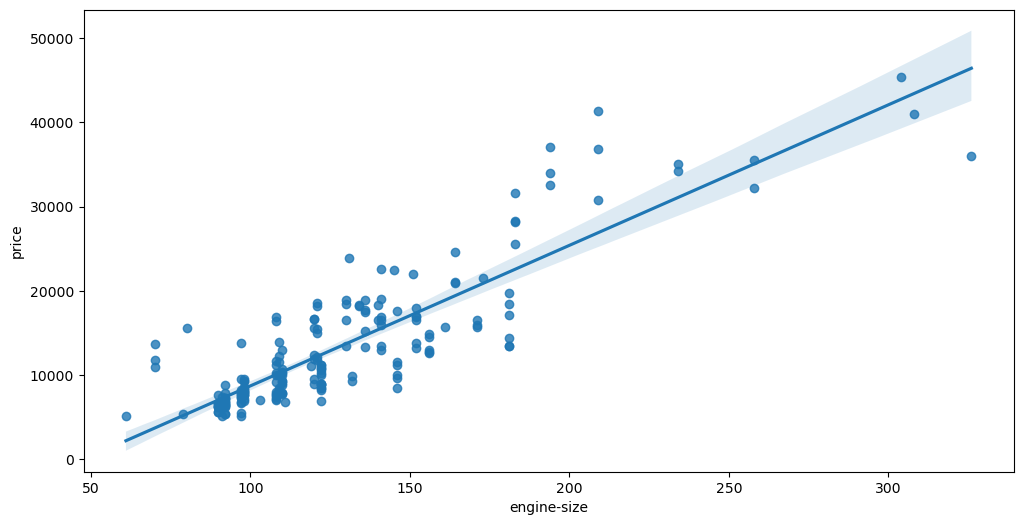

In [53]:
plt.figure(figsize=(12, 6))
sns.regplot(x='engine-size', y='price', data=df)
plt.show()

This shows engine-size's increase increases price.i.e positive-correlation

In [57]:
y_hat = model.predict(x_train_multi)

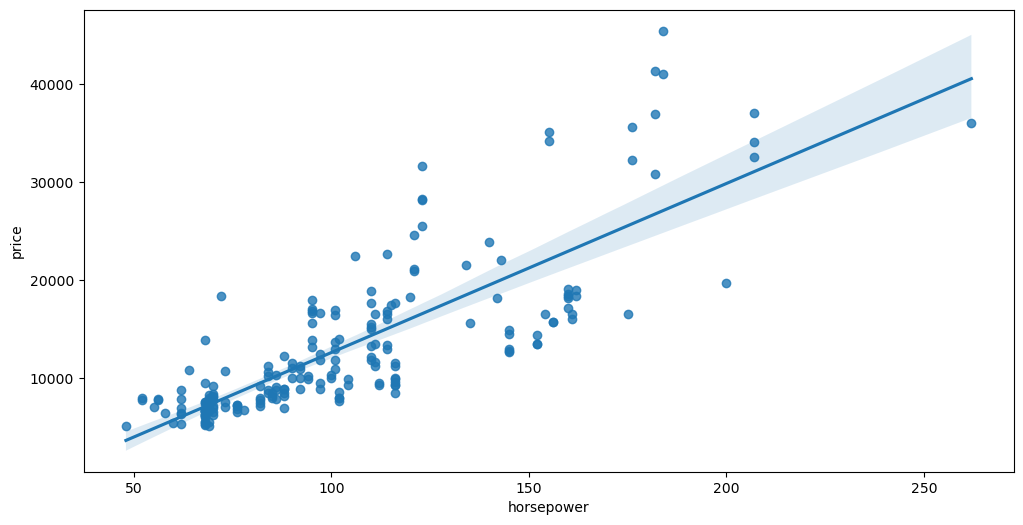

In [54]:
plt.figure(figsize=(12, 6))
sns.regplot(x='horsepower', y='price', data=df)
plt.show()

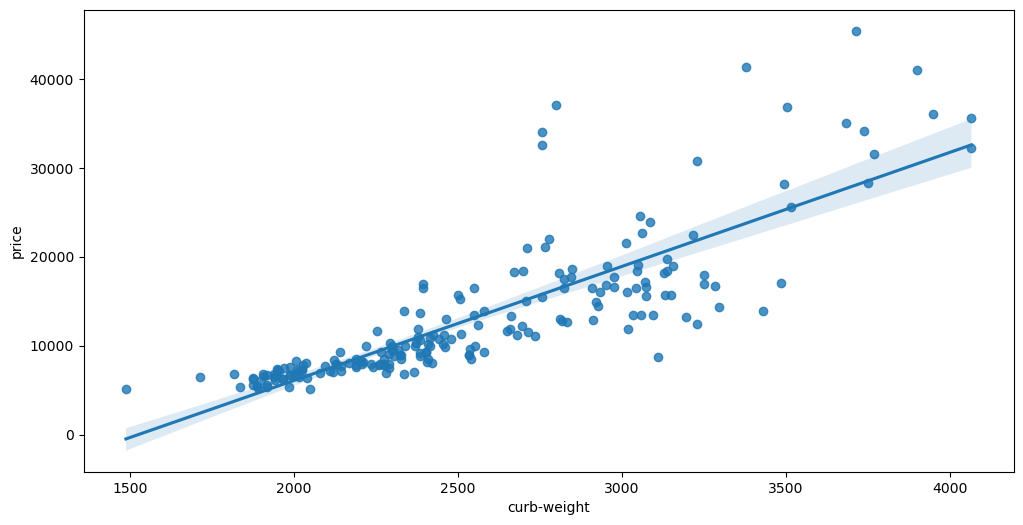

In [55]:
plt.figure(figsize=(12, 6))
sns.regplot(x='curb-weight', y='price', data=df)
plt.show()

## Distribution Plot

/tmp/ipykernel_3550/659575461.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axz = sns.distplot(y_test, hist=False, color='r', label='Actual_Value')
/tmp/ipykernel_3550/659575461.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_hat, hist=False, color='b', label='Fitted_Values', ax

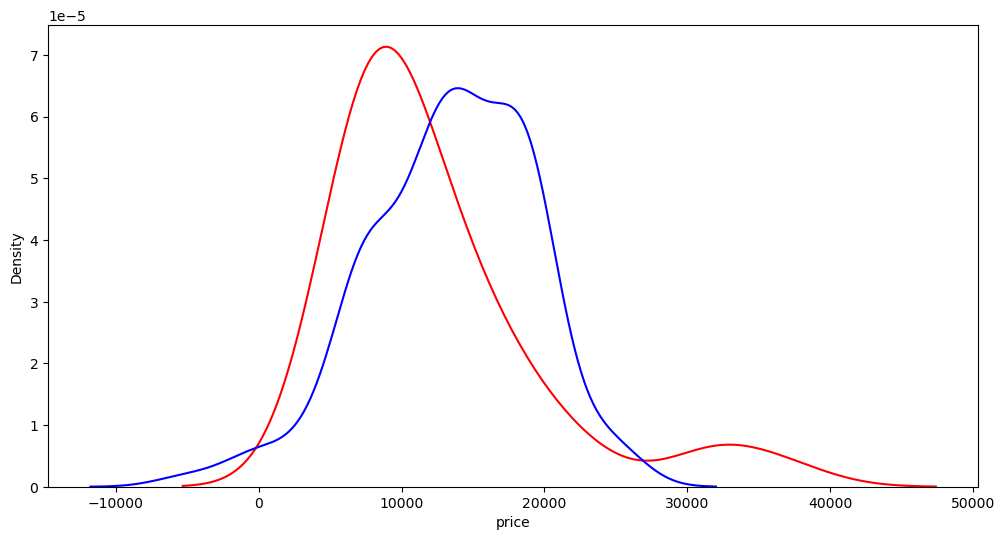

In [64]:
plt.figure(figsize=(12, 6))
axz = sns.distplot(y_test, hist=False, color='r', label='Actual_Value')
sns.distplot(y_hat, hist=False, color='b', label='Fitted_Values', ax =axz)
plt.show()

/tmp/ipykernel_3550/2487776199.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  axl = sns.distplot(y_test, hist=False, color='r', label='Actual_Value')


AttributeError: module 'seaborn' has no attribute 'display'

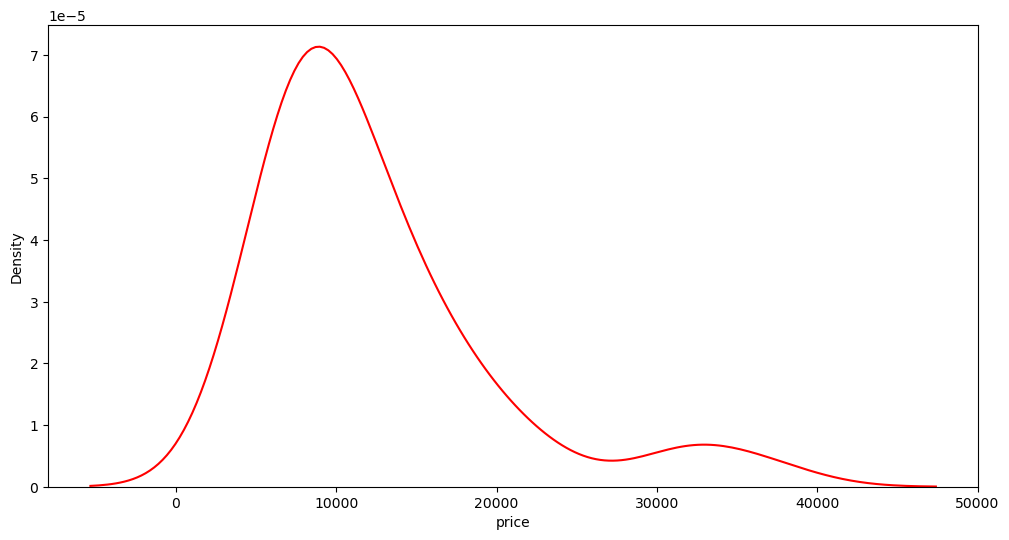

In [60]:
plt.figure(figsize=(12, 6))
axl = sns.distplot(y_test, hist=False, color='r', label='Actual_Value')
sns.display(y_hat, hist=False, color='r', label='Fitted_Values', ax =ax1)
plt.show()